In [1]:
from cloth import Cloth
import pyvista as pv
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tol_array = np.linspace(1e-1,1e-5,30)
iterations_mean = []
durations = []

In [3]:
for tol in tol_array:
    print("Tolerancia atual ", tol)
    c = Cloth(15,10,tol,1.0)
    
    start_time = time.time()
    iterations = []
    for i in range(75):
        iterations += [c.runSim(10.0)]
        vertices = c.getVertices()
    iterations_mean += [np.mean(iterations)]
    durations += [time.time()-start_time]

iterations_dict = {
    'Tolerance': tol_array,
    'It Mean': iterations_mean,
    'Duration': durations
}
df = pd.DataFrame(iterations_dict)
df.to_csv('tolerance_it.csv')

Tolerancia atual  0.1
Tolerancia atual  0.09655206896551724
Tolerancia atual  0.09310413793103449
Tolerancia atual  0.08965620689655172
Tolerancia atual  0.08620827586206897
Tolerancia atual  0.08276034482758621
Tolerancia atual  0.07931241379310344
Tolerancia atual  0.07586448275862069
Tolerancia atual  0.07241655172413794
Tolerancia atual  0.06896862068965517
Tolerancia atual  0.06552068965517241
Tolerancia atual  0.06207275862068966
Tolerancia atual  0.05862482758620689
Tolerancia atual  0.055176896551724135
Tolerancia atual  0.051728965517241376
Tolerancia atual  0.04828103448275862
Tolerancia atual  0.04483310344827586
Tolerancia atual  0.0413851724137931
Tolerancia atual  0.037937241379310344
Tolerancia atual  0.03448931034482758
Tolerancia atual  0.031041379310344827
Tolerancia atual  0.027593448275862062
Tolerancia atual  0.02414551724137931
Tolerancia atual  0.020697586206896545
Tolerancia atual  0.01724965517241378
Tolerancia atual  0.013801724137931029
Tolerancia atual  0.01

In [5]:
df = pd.read_csv('tolerance_it.csv')
df

,Unnamed: 0,Tolerance,It Mean,Duration
0,0,0.100000,26.600000,7.802662
1,1,0.096552,26.213333,7.637490
2,2,0.093104,26.373333,7.735644
3,3,0.089656,27.960000,8.035026
4,4,0.086208,28.720000,8.311499
5,5,0.082760,28.546667,8.757676
6,6,0.079312,28.133333,8.427462
7,7,0.075864,29.040000,8.198151
8,8,0.072417,30.000000,8.250959
9,9,0.068969,31.213333,8.641372


In [9]:
df['It Mean'].to_list()

[26.6,
 26.21333333333333,
 26.37333333333333,
 27.96,
 28.72,
 28.546666666666667,
 28.133333333333333,
 29.04,
 30.0,
 31.21333333333333,
 32.346666666666664,
 34.13333333333333,
 34.586666666666666,
 35.626666666666665,
 36.373333333333335,
 39.08,
 40.52,
 42.72,
 45.12,
 47.50666666666667,
 51.10666666666667,
 55.84,
 59.013333333333335,
 63.28,
 70.56,
 80.46666666666667,
 91.54666666666668,
 111.50666666666666,
 148.38666666666666,
 827.8133333333334]

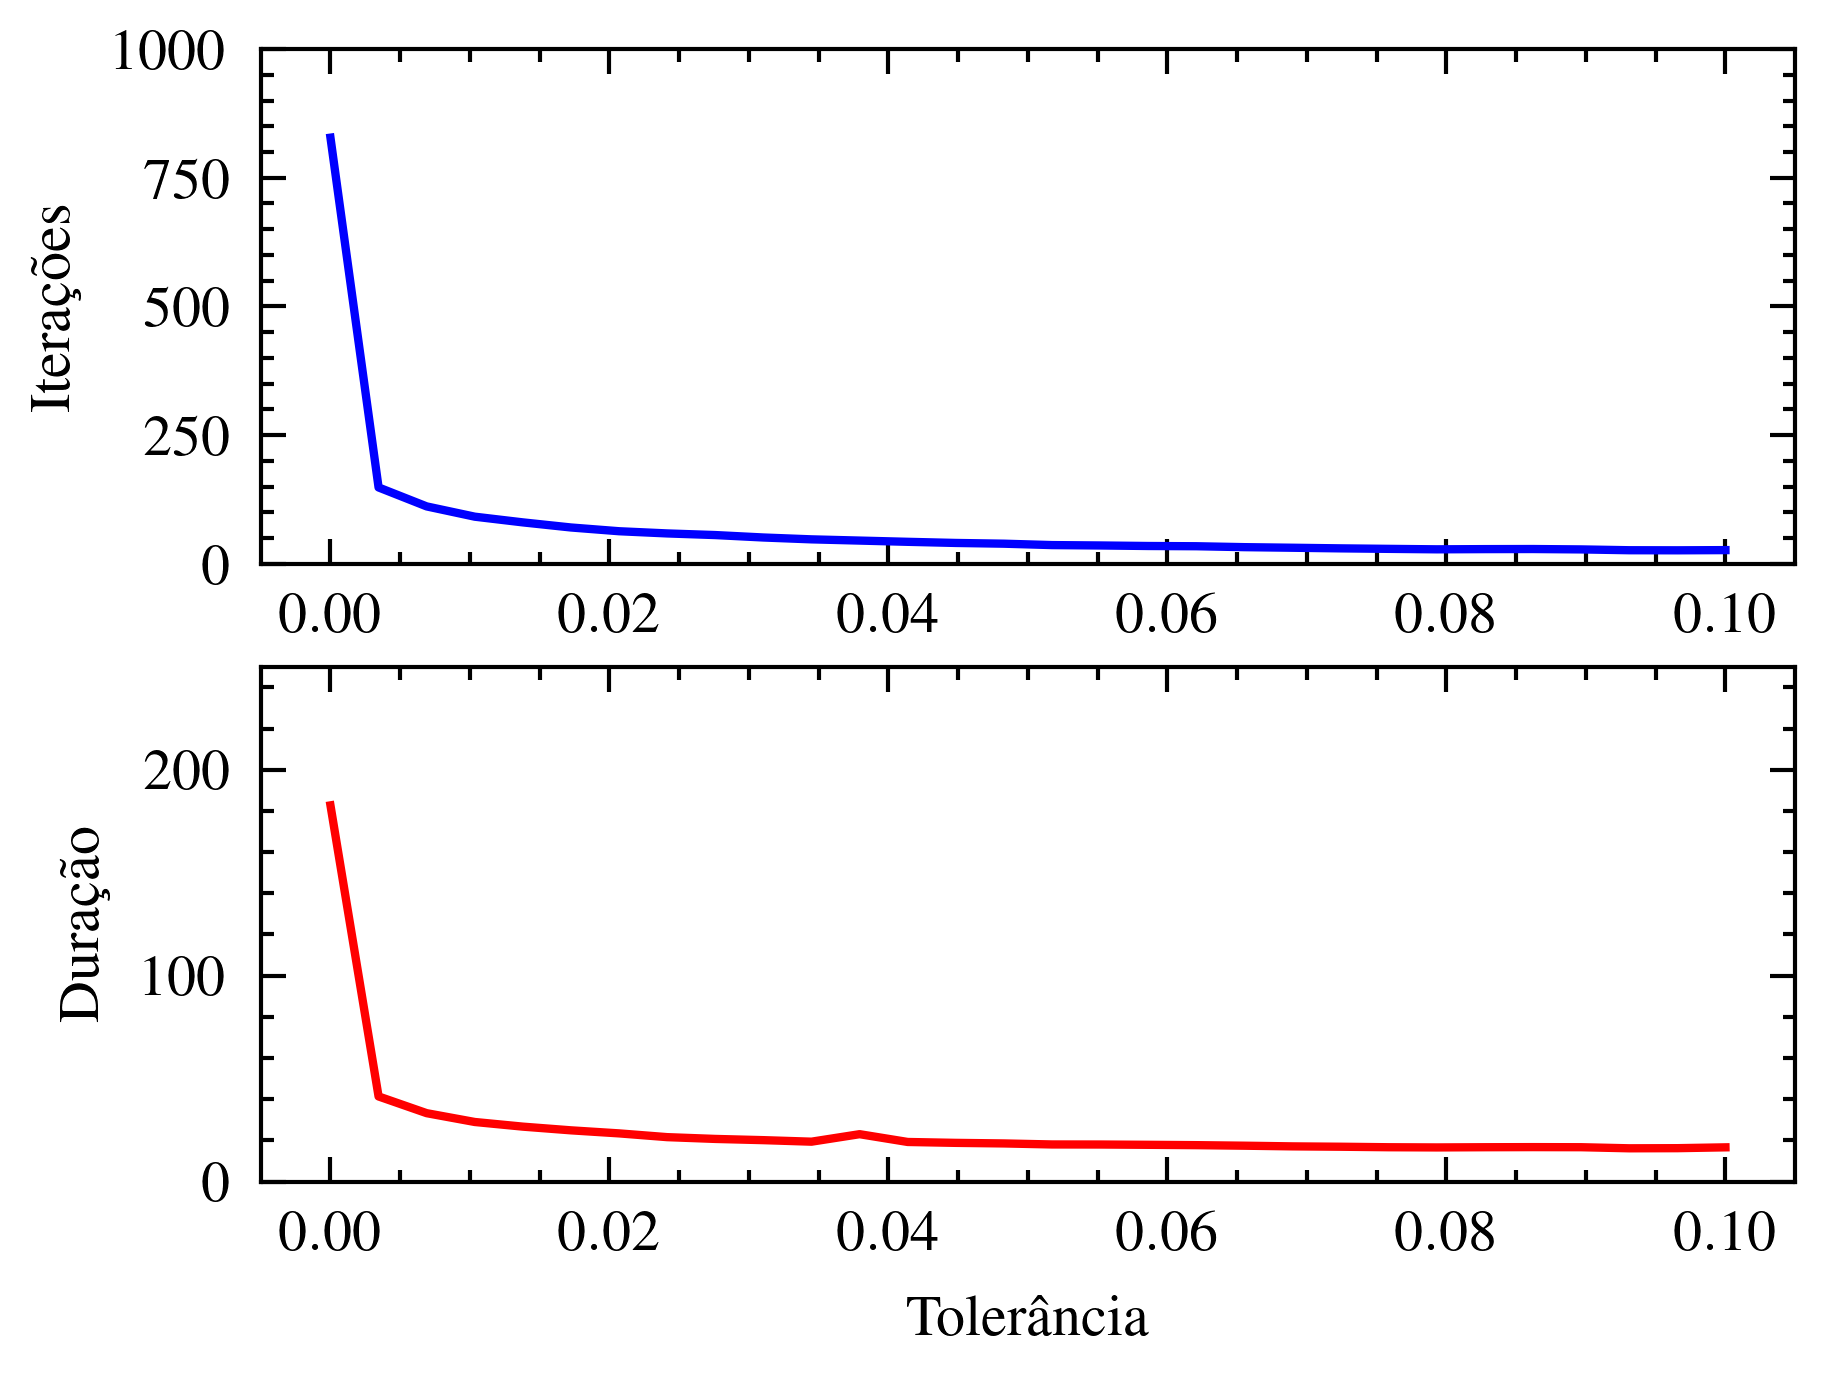

In [43]:
# fig, ax1 = plt.subplots()



fig, axs = plt.subplots(2)

axs[0].plot(df.Tolerance.to_list(), df['It Mean'].to_list(), '-',color='b')
axs[0].set_ylabel('Iterações')
axs[1].plot(df.Tolerance.to_list(), df.Duration.to_list(), '-', color='r')
axs[1].set_ylabel('Duração')
axs[0].set_xlabel('Tolerância')
axs[1].set_xlabel('Tolerância')
axs[0].set_ylim([0,1000])
axs[1].set_ylim([0,250])

plt.style.use(['science','ieee'])
plt.rcParams.update({'font.size': 7})

# color = 'tab:red'
# ax1.set_xlabel('Tolerância')
# ax1.set_ylabel('Iterações', color=color)
# ax1.plot(df.Tolerance.to_list(), df['It Mean'].to_list(), '.',color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Duração', color=color)  # we already handled the x-label with ax1
# ax2.plot(df.Tolerance.to_list(), df.Duration.to_list(), '.', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figTolTime.pdf')
plt.show()

In [2]:
particles_array = np.arange(0,35)
iterations_mean = []
durations = []
particles = []

In [3]:
particles

[]

In [4]:
for p in particles_array:
    print("NumPart ", p)
    c = Cloth(3+p,2+p,0.05,1.0)
    
    start_time = time.time()
    iterations = []
    for i in range(75):
        iterations += [c.runSim(10.0)]
        vertices = c.getVertices()
    iterations_mean += [np.mean(iterations)]
    durations += [time.time()-start_time]
    particles += [c.getNumPar()]
    print(particles)
    
iterations_dict = {
    'Particles': particles,
    'It Mean': iterations_mean,
    'Duration': durations
}
df = pd.DataFrame(iterations_dict)
df.to_csv('particle_it.csv')

NumPart  0
[6]
NumPart  1
[6, 12]
NumPart  2
[6, 12, 20]
NumPart  3
[6, 12, 20, 30]
NumPart  4
[6, 12, 20, 30, 42]
NumPart  5
[6, 12, 20, 30, 42, 56]
NumPart  6
[6, 12, 20, 30, 42, 56, 72]
NumPart  7
[6, 12, 20, 30, 42, 56, 72, 90]
NumPart  8
[6, 12, 20, 30, 42, 56, 72, 90, 110]
NumPart  9
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132]
NumPart  10
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156]
NumPart  11
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182]
NumPart  12
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210]
NumPart  13
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210, 240]
NumPart  14
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210, 240, 272]
NumPart  15
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210, 240, 272, 306]
NumPart  16
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210, 240, 272, 306, 342]
NumPart  17
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 156, 182, 210, 240, 272, 306, 342, 380]
NumPart  18
[6, 12, 20, 30, 42, 56, 72, 90, 110, 132, 1

In [5]:
df

,Particles,It Mean,Duration
0,6,2.186667,0.016473
1,12,4.226667,0.061583
2,20,6.013333,0.162251
3,30,8.360000,0.368709
4,42,10.866667,0.727372
5,56,14.293333,1.299689
6,72,17.160000,2.076637
7,90,20.933333,3.207787
8,110,25.133333,4.784270
9,132,28.773333,6.774434


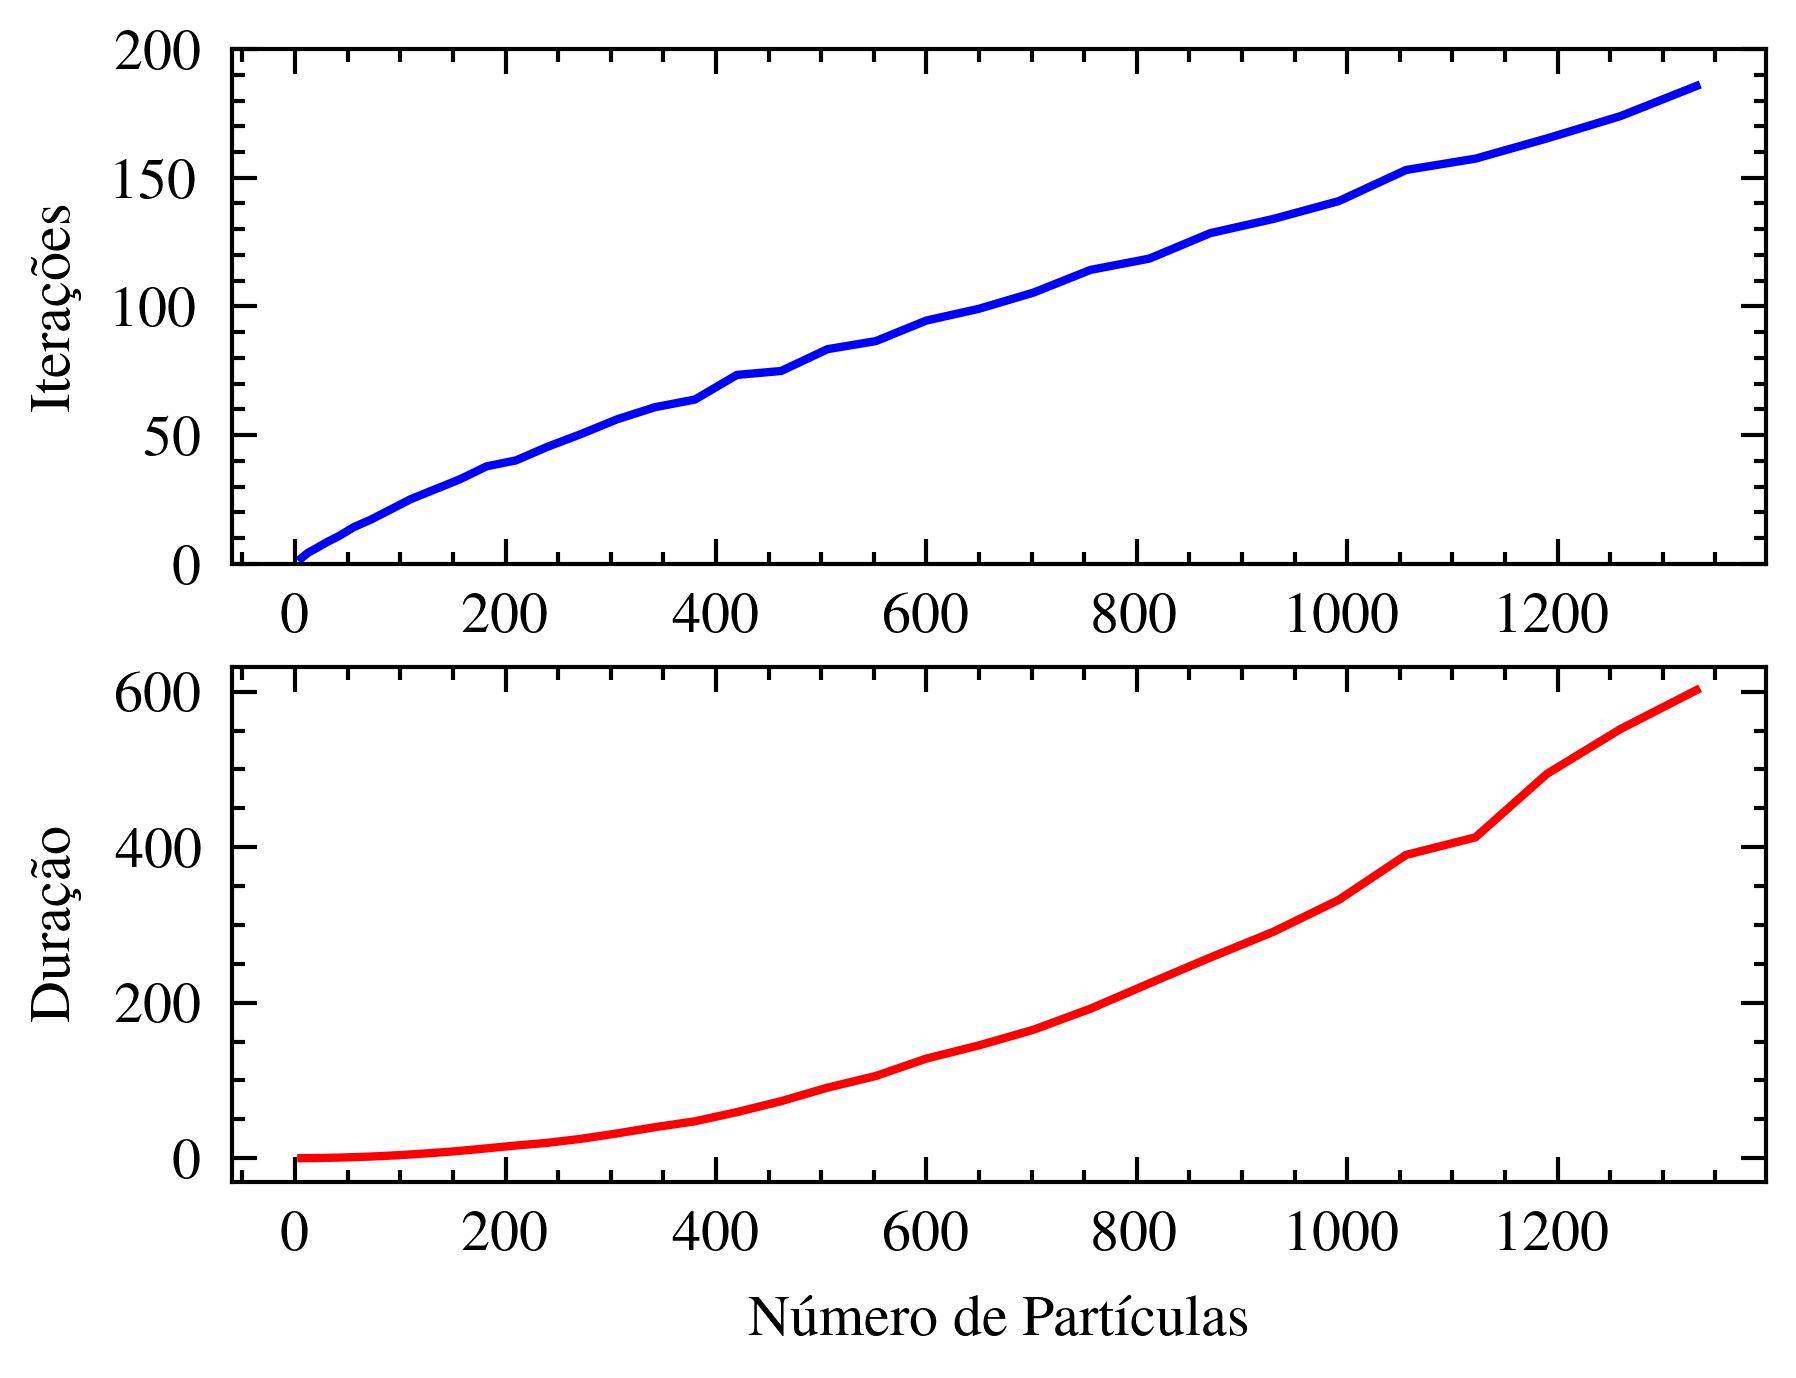

In [8]:
# fig, ax1 = plt.subplots()



fig, axs = plt.subplots(2)

axs[0].plot(df.Particles.to_list(), df['It Mean'].to_list(), '-',color='b')
axs[0].set_ylabel('Iterações')
axs[1].plot(df.Particles.to_list(), df.Duration.to_list(), '-', color='r')
axs[1].set_ylabel('Duração')
axs[0].set_xlabel("Número de Partículas")
axs[1].set_xlabel("Número de Partículas")
axs[0].set_ylim([0,200])
# axs[1].set_ylim([0,50])

plt.style.use(['science','ieee'])
plt.rcParams.update({'font.size': 7})

# color = 'tab:red'
# ax1.set_xlabel('Tolerância')
# ax1.set_ylabel('Iterações', color=color)
# ax1.plot(df.Tolerance.to_list(), df['It Mean'].to_list(), '.',color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Duração', color=color)  # we already handled the x-label with ax1
# ax2.plot(df.Tolerance.to_list(), df.Duration.to_list(), '.', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figPartTime.pdf')
plt.show()